### Codio Activity 23.2: Convolutional Neural Network

**Expected Time = 60 minutes**

**Total Points = 40**

This activity focuses on using a basic convolutional architecture to predict handwritten digits from the `mnist` dataset.  Your goal is to again use the preprocessing tools of `keras` to prepare the data.  Next, you will use the `Conv2D` and `MaxPool2D` layers to create the feature maps of digits.   Finally, you will flatten the resulting feature maps and pass them through a conventional dense architecture.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

Run the code cell below to import the necessary libraries.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

[Back to top](#-Index)

### Problem 1

#### Loading the Data

**10 Points**

Below, use the function `load_data()` on the `mnist` dataset to load the dataset. Assign your dataset to the variable `(X_train, Y_train), (X_test, Y_test)` below.

Use the function `reshape` on `X_train` to reshape the training data in anticipation of the convolutional layers: set the arguments of the function `reshape ` equal to `(60_000, 28, 28, 1)`.  Assign this object to `X_train`.

Use the function `reshape` on `X_test` to reshape the testing data in anticipation of the convolutional layers: set the arguments of the function `reshape ` equal to `(10_000, 28, 28, 1)`.  Assign this object to `X_test`.


Create an `ImageDataGenerator` object with the argument `rescale = 1/255.` and assign to the variable `gen`.  

Use the function `to_categorical` to convert the training and testing target variables. Assign these new objects to `Y_train` and `Y_test`, respectively.

Use the `.flow()` function on the generator `gen`  with the reshaped and dummied `X_train` and `Y_train` to create the `train_gen` object.

Use the `.flow()` function on the generator `gen`  with the reshaped and dummied `X_test` and `Y_test` to create the `test_gen` object.


NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power. 

In [7]:
### GRADED
tf.random.set_seed(42)
(X_train, Y_train), (X_test, Y_test) = ('', ''), ('', '')
X_train = ''
X_test = ''
gen = ''
Y_train = ''
Y_test = ''
train_gen = ''
test_gen = ''
    
# YOUR CODE HERE
tf.random.set_seed(42)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)
gen = ImageDataGenerator(rescale=1/255.)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
train_gen = gen.flow(X_train, Y_train)
test_gen = gen.flow(X_test, Y_test)

### ANSWER CHECK
print(train_gen)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


[Back to top](#-Index)

### Problem 2

#### Constructing the Convolutional Layers

**10 Points**

Below, create a neural network named `conv_model` using the following architecture:

- One `Conv2D` layer with 16 filters and a kernel of size equal to 3 x 3 with `relu` activation
- One `MaxPool2D` layer with pool size equal to 2 x 2
- One `Flatten` layer to flatten the results of pooling
- One `Dense` layer with 50 nodes and `relu` activation
- One `Dense` output layer 10 noded and with `softmax` activation

Compile `conv_model` using `categorical_crossentropy` as your `loss` and  `accuracy` as your `metric`.

In [8]:
### GRADED
tf.random.set_seed(42)
conv_model = ''

    
# YOUR CODE HERE
tf.random.set_seed(42)
conv_model = Sequential([Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'),
                         MaxPool2D(pool_size = (2, 2)),
                         Flatten(),
                         Dense(50, activation = 'relu'),
                         Dense(10, activation = 'softmax')])
conv_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

### ANSWER CHECK
conv_model.build(input_shape = (X_train.shape[0], 28, 28, 1))
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (60000, 26, 26, 16)       160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (60000, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (60000, 2704)             0         
                                                                 
 dense_2 (Dense)             (60000, 50)               135250    
                                                                 
 dense_3 (Dense)             (60000, 10)               510       
                                                                 
Total params: 135920 (530.94 KB)
Trainable params: 135920 (530.94 KB)
Non-trainable params: 0 (0.00 Byte)
______________

[Back to top](#-Index)

### Problem 3

#### Examining the Training

**10 Points**

Use the `fit()` function on `conv_model` to fit the reshaped training data `train_gen`. Set the argument `validation_data` equal to `test_gen`, the argument `epochs` equal to 1, and the argument `verbose` equal to 0.  Assign the result to the variable `history` below. Feel free to uncomment the code to visualize the resulting fit accuracies.

NOTE: This question is computationally expensive, so please be patient with the processing. It may take a few minutes based on your computing power. 

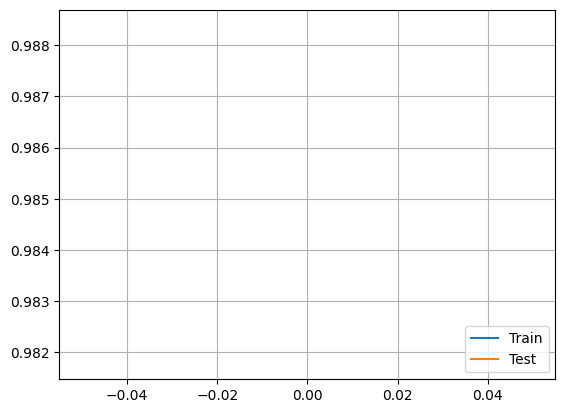

In [13]:
### GRADED
tf.random.set_seed(42)
history = ''

    
# YOUR CODE HERE
tf.random.set_seed(42)
history = conv_model.fit(train_gen, validation_data=test_gen, epochs=1, verbose = 0)

### ANSWER CHECK
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.grid()
plt.legend(loc = 'lower right');

[Back to top](#-Index)

### Problem 4

#### Predicting with a New Image

**10 Points**


Below, we have defined the object `test_images` for you with 5 observations. 

Use the function `reshape` on `test_images` with argument equal to `(num_observations, 28, 28, 1)`. Assign this new object to `test_images_shaped`.

Next, use the function `predict()` on the `conv_model` object with argument equal to `test_images_shaped`. Use the function NumPy  function `argmax` to retrieve the indices of the maximum elements in the array along the `axis` 1.
Assign the result to the variable `preds`.

HINT: The pseudocode for this last step is given below:

```Python
preds = np.argmax(conv_model.predict(...), axis = ...)
```


1/1 [==============================] - 0s 41ms/step
[7 2 1 0 4]


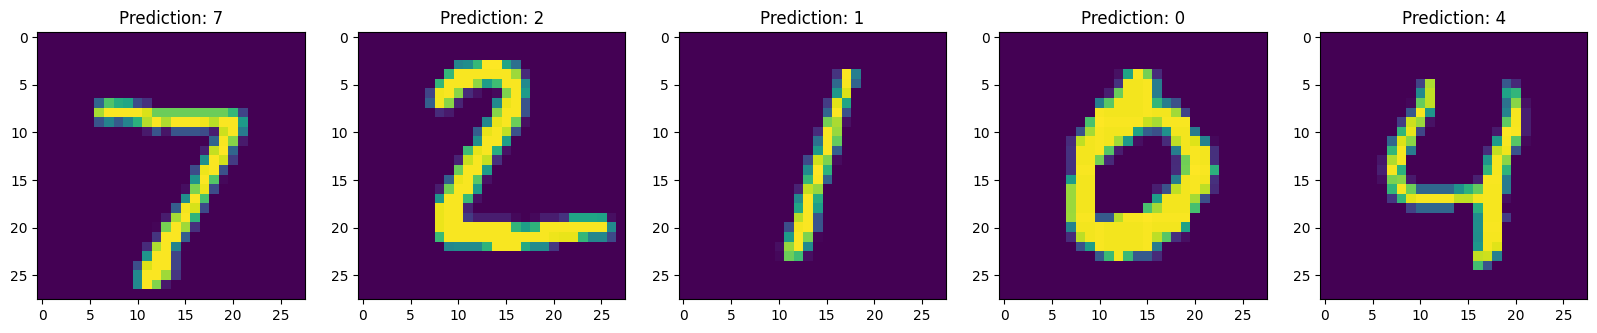

In [10]:
### GRADED
tf.random.set_seed(42)
test_images = X_test[:5]
preds = ''

    
# YOUR CODE HERE
tf.random.set_seed(42)
test_images_shaped = test_images.reshape(5, 28, 28, 1)
preds = np.argmax(conv_model.predict(test_images_shaped), axis = 1)

### ANSWER CHECK
print(preds)
fig, ax = plt.subplots(1, 5, figsize = (20, 4))
for i, im in enumerate(test_images):
    ax[i].imshow(im.reshape(28, 28))
    ax[i].set_title(f'Prediction: {preds[i]}')